# Fake Jobs

## Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk 
from nltk.tokenize import word_tokenize
from collections import Counter
sns.set(style = "darkgrid",font_scale = 1.2)

import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split


jobs = pd.read_csv('fake_job_postings.csv')


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Understanding the Data

In [3]:
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
jobs.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
jobs = jobs.replace(np.nan, '', regex=True)

## EDA

### Bar Plots

<AxesSubplot:xlabel='required_experience', ylabel='count'>

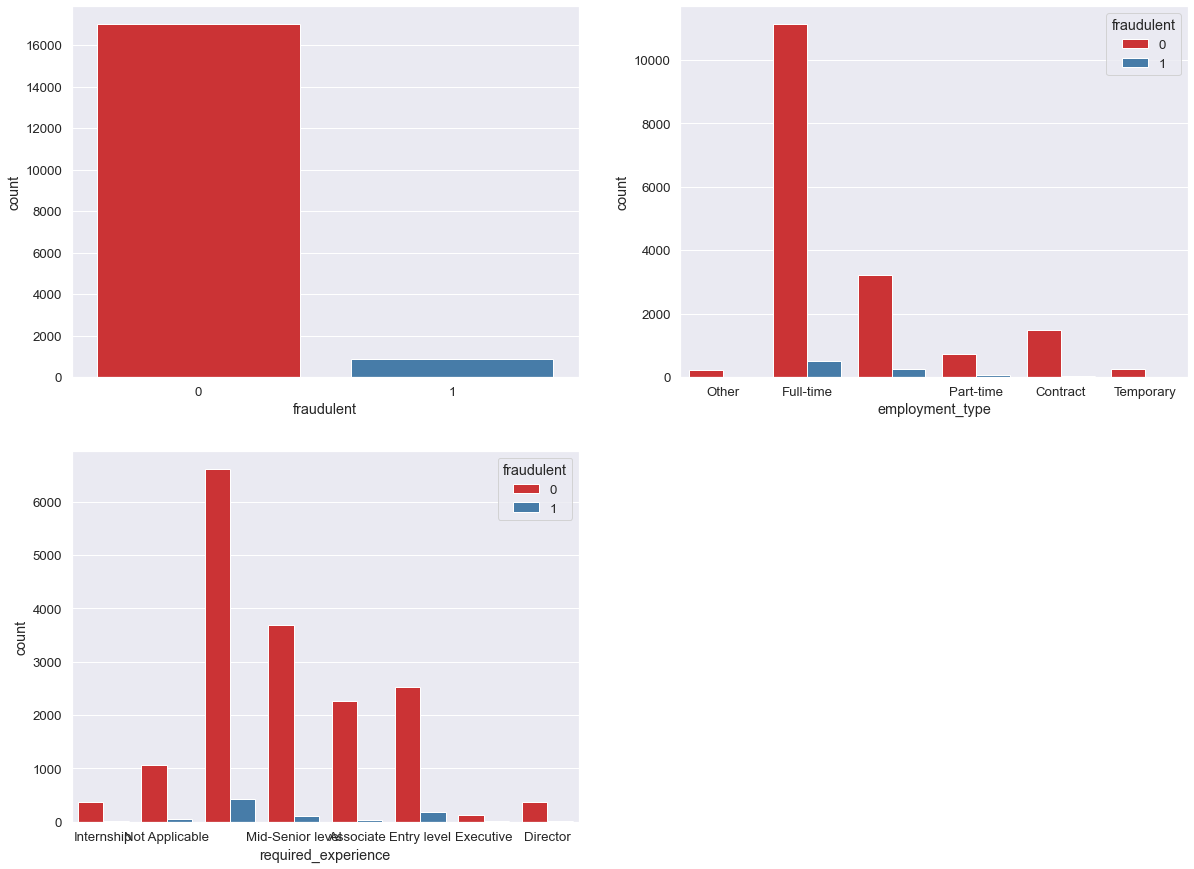

In [6]:
plt.figure(figsize=(20,15)) 


plt.subplot(2, 2, 1)# (rows, columns, panel number)
sns.countplot(x = "fraudulent", data = jobs, palette="Set1")

plt.subplot(2, 2, 2)
sns.countplot(x = "employment_type", data = jobs, hue="fraudulent", palette="Set1")

plt.subplot(2, 2, 3)
sns.countplot(x="required_experience",hue="fraudulent",data=jobs, palette="Set1")


## Description and Company Profile 

In [7]:
# Numbr of Characters in each paragraph
jobs['desc_chars'] = jobs['description'].str.len()
jobs['comp_chars'] = jobs['company_profile'].str.len()
jobs['desc_chars'] = pd.to_numeric(jobs['desc_chars'])
jobs['comp_chars'] = pd.to_numeric(jobs['comp_chars'])

<Figure size 864x576 with 0 Axes>

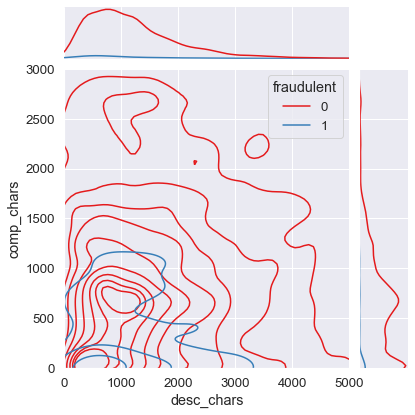

In [8]:
plt.figure(figsize=(12,8)) 
sns.jointplot(x="desc_chars", y="comp_chars", data=jobs,kind='kde',xlim=(0,5000),ylim=(0,3000),hue="fraudulent",
                  palette ="Set1")

(0.0, 4000.0)

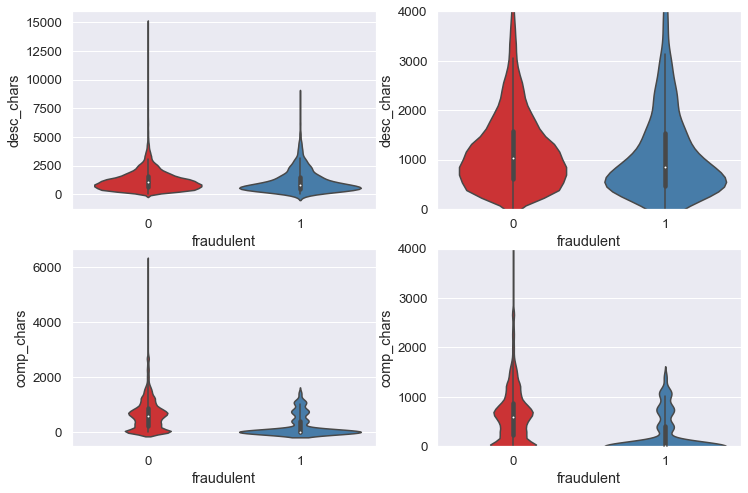

In [9]:
plt.figure(figsize=(12,8)) 

plt.subplot(2, 2, 1)# (rows, columns, panel number)
sns.violinplot(x = "fraudulent", y = "desc_chars", data = jobs, palette="Set1")

plt.subplot(2, 2, 2)# (rows, columns, panel number)
sns.violinplot(x = "fraudulent", y = "desc_chars", data = jobs, palette="Set1")
plt.ylim(0,4000)

plt.subplot(2, 2, 3)# (rows, columns, panel number)
sns.violinplot(x = "fraudulent", y = "comp_chars", data = jobs, palette="Set1")

plt.subplot(2, 2, 4)# (rows, columns, panel number)
sns.violinplot(x = "fraudulent", y = "comp_chars", data = jobs, palette="Set1")
plt.ylim(0,4000)

In [10]:
#Project Locations of job onto map?????

## Dealing With Stop Words

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [12]:
# Joining all relevant columns together
jobs["all_text"] = jobs["title"] + " " + jobs["location"] + " " + jobs["department"] + " " + jobs["company_profile"] + " " + jobs["description"] + " " + jobs["requirements"] + " " + jobs["benefits"] + " " + jobs["employment_type"] + " " + jobs["required_experience"] + " " + jobs["required_education"] + " " + jobs["industry"] + " " + jobs["function"]
        
#Removing unused columns
del jobs["title"] 
del jobs["location"] 
del jobs["department"]
del jobs["company_profile"] 
del jobs["description"] 
del jobs["requirements"] 
del jobs["benefits"] 
del jobs["employment_type"] 
del jobs["required_experience"] 
del jobs["required_education"] 
del jobs["industry"]
del jobs["function"]
del jobs["job_id"]
del jobs["salary_range"]


In [13]:
jobs.head()

,telecommuting,has_company_logo,has_questions,fraudulent,desc_chars,comp_chars,all_text
0,0,1,0,0,905,885,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,2077,1286,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,355,879,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,2600,614,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,1520,1628,"Bill Review Manager US, FL, Fort Worth SpotSo..."


In [14]:
#Remove Stop Words
jobs['all_text'] = jobs.all_text.str.replace("[^\w\s]", "").str.lower()
jobs['all_text'] = jobs['all_text'].apply(lambda x: [item for item in x.split() if item not in stop])
jobs['all_text']= jobs['all_text'].str.join(" ") 

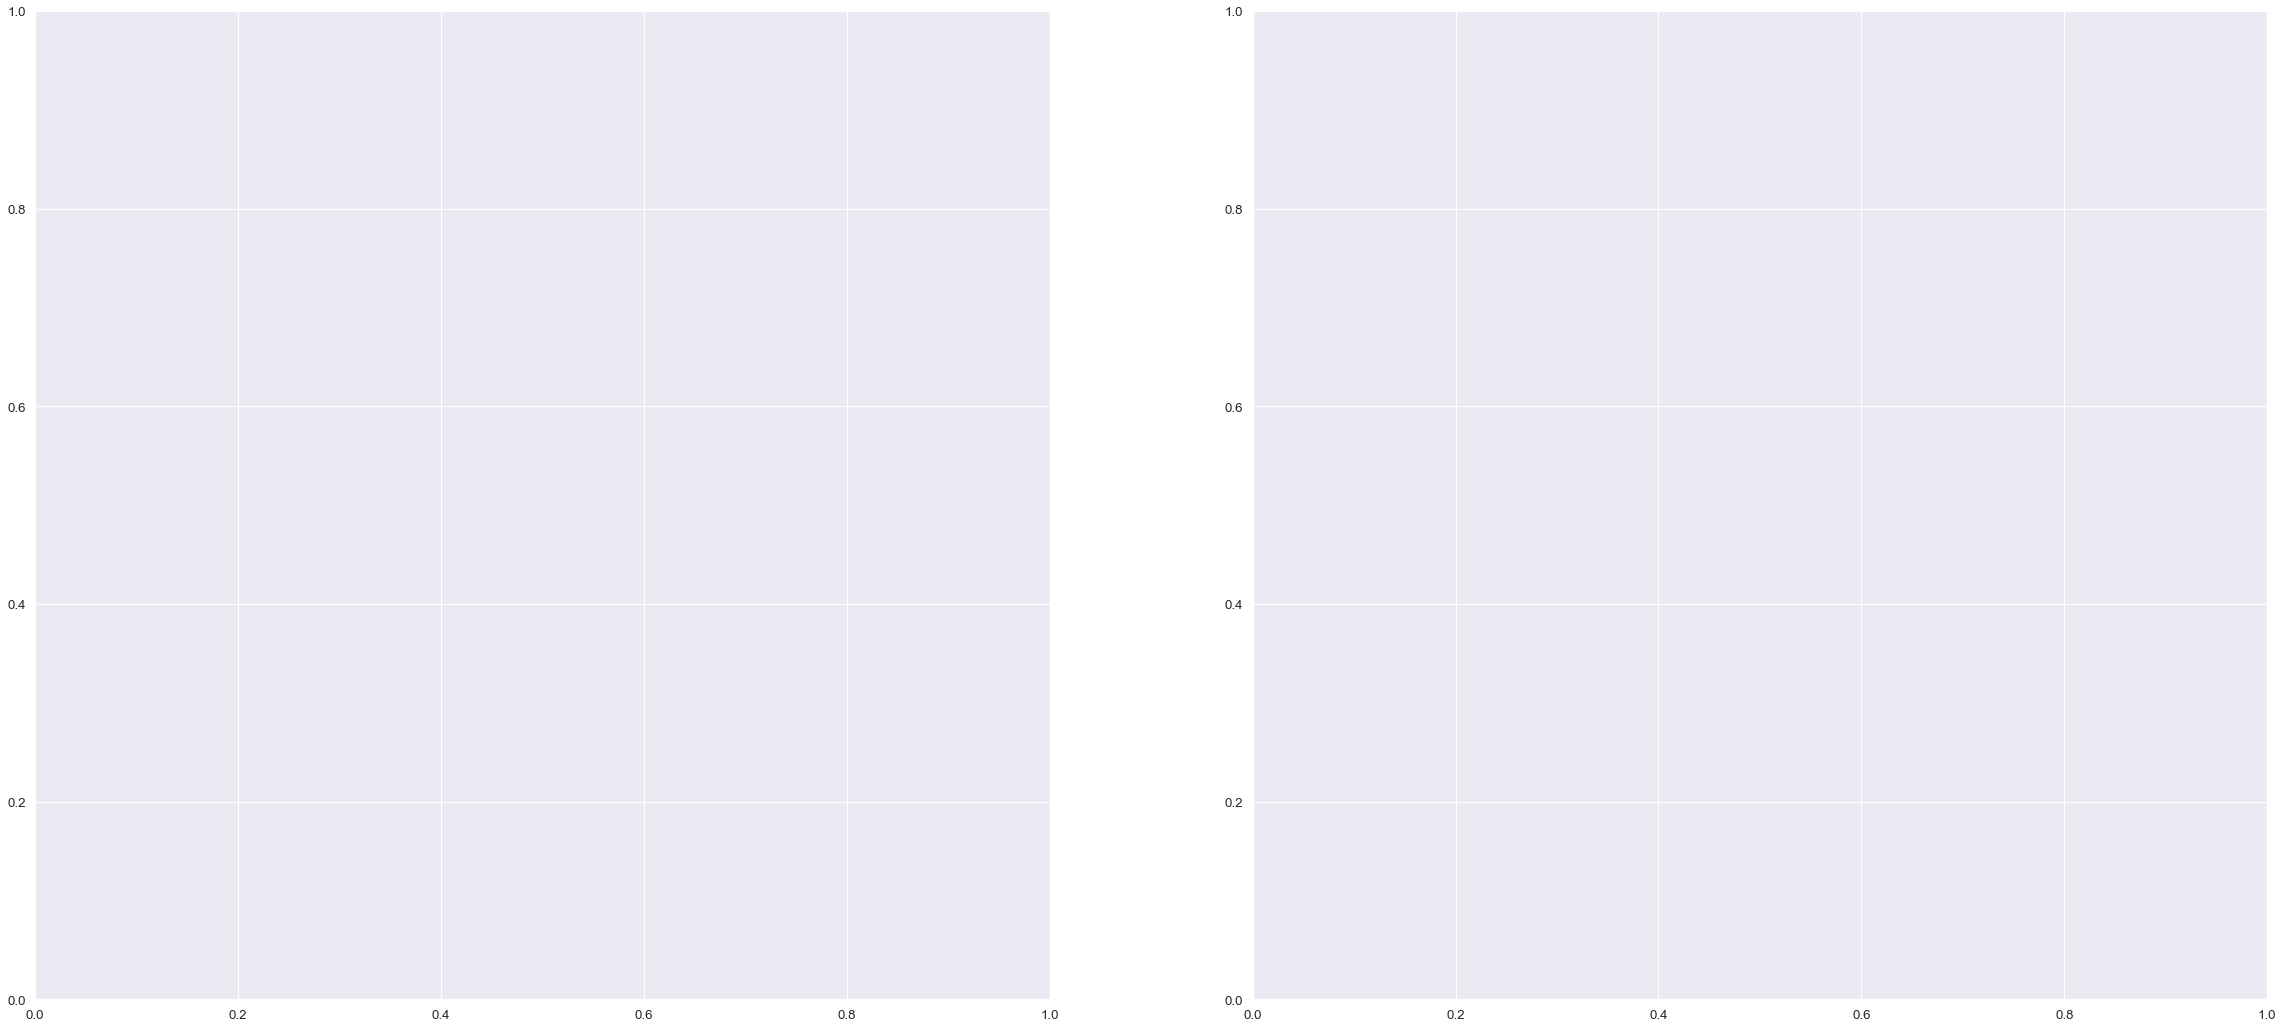

In [15]:
plt.figure(figsize=(40,40)) 

plt.subplot(2, 2, 1)# (rows, columns, panel number)
wc1 = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(jobs[jobs.fraudulent == 0].all_text))

wc1.to_file('wc1.png')
plt.subplot(2, 2, 2)
wc2 = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(jobs[jobs.fraudulent == 1].all_text))

wc2.to_file('wc2.png')

In [16]:
# Where do these place in america
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="bobbybaillie123@gmail.com")
#jobs['coord'] = jobs['location'].apply(geolocator.geocode)
#jobs

## Ngrams

In [17]:
from nltk import ngrams

text = [' '.join(jobs['all_text'])]
text = str(text)


onegrams = ngrams(text.split(), 1)
bigrams = ngrams(text.split(), 2)
trigrams = ngrams(text.split(), 3)


In [18]:
onegrams = Counter(onegrams).most_common(10)
bigrams = Counter(bigrams).most_common(10)
trigrams = Counter(trigrams).most_common(10)






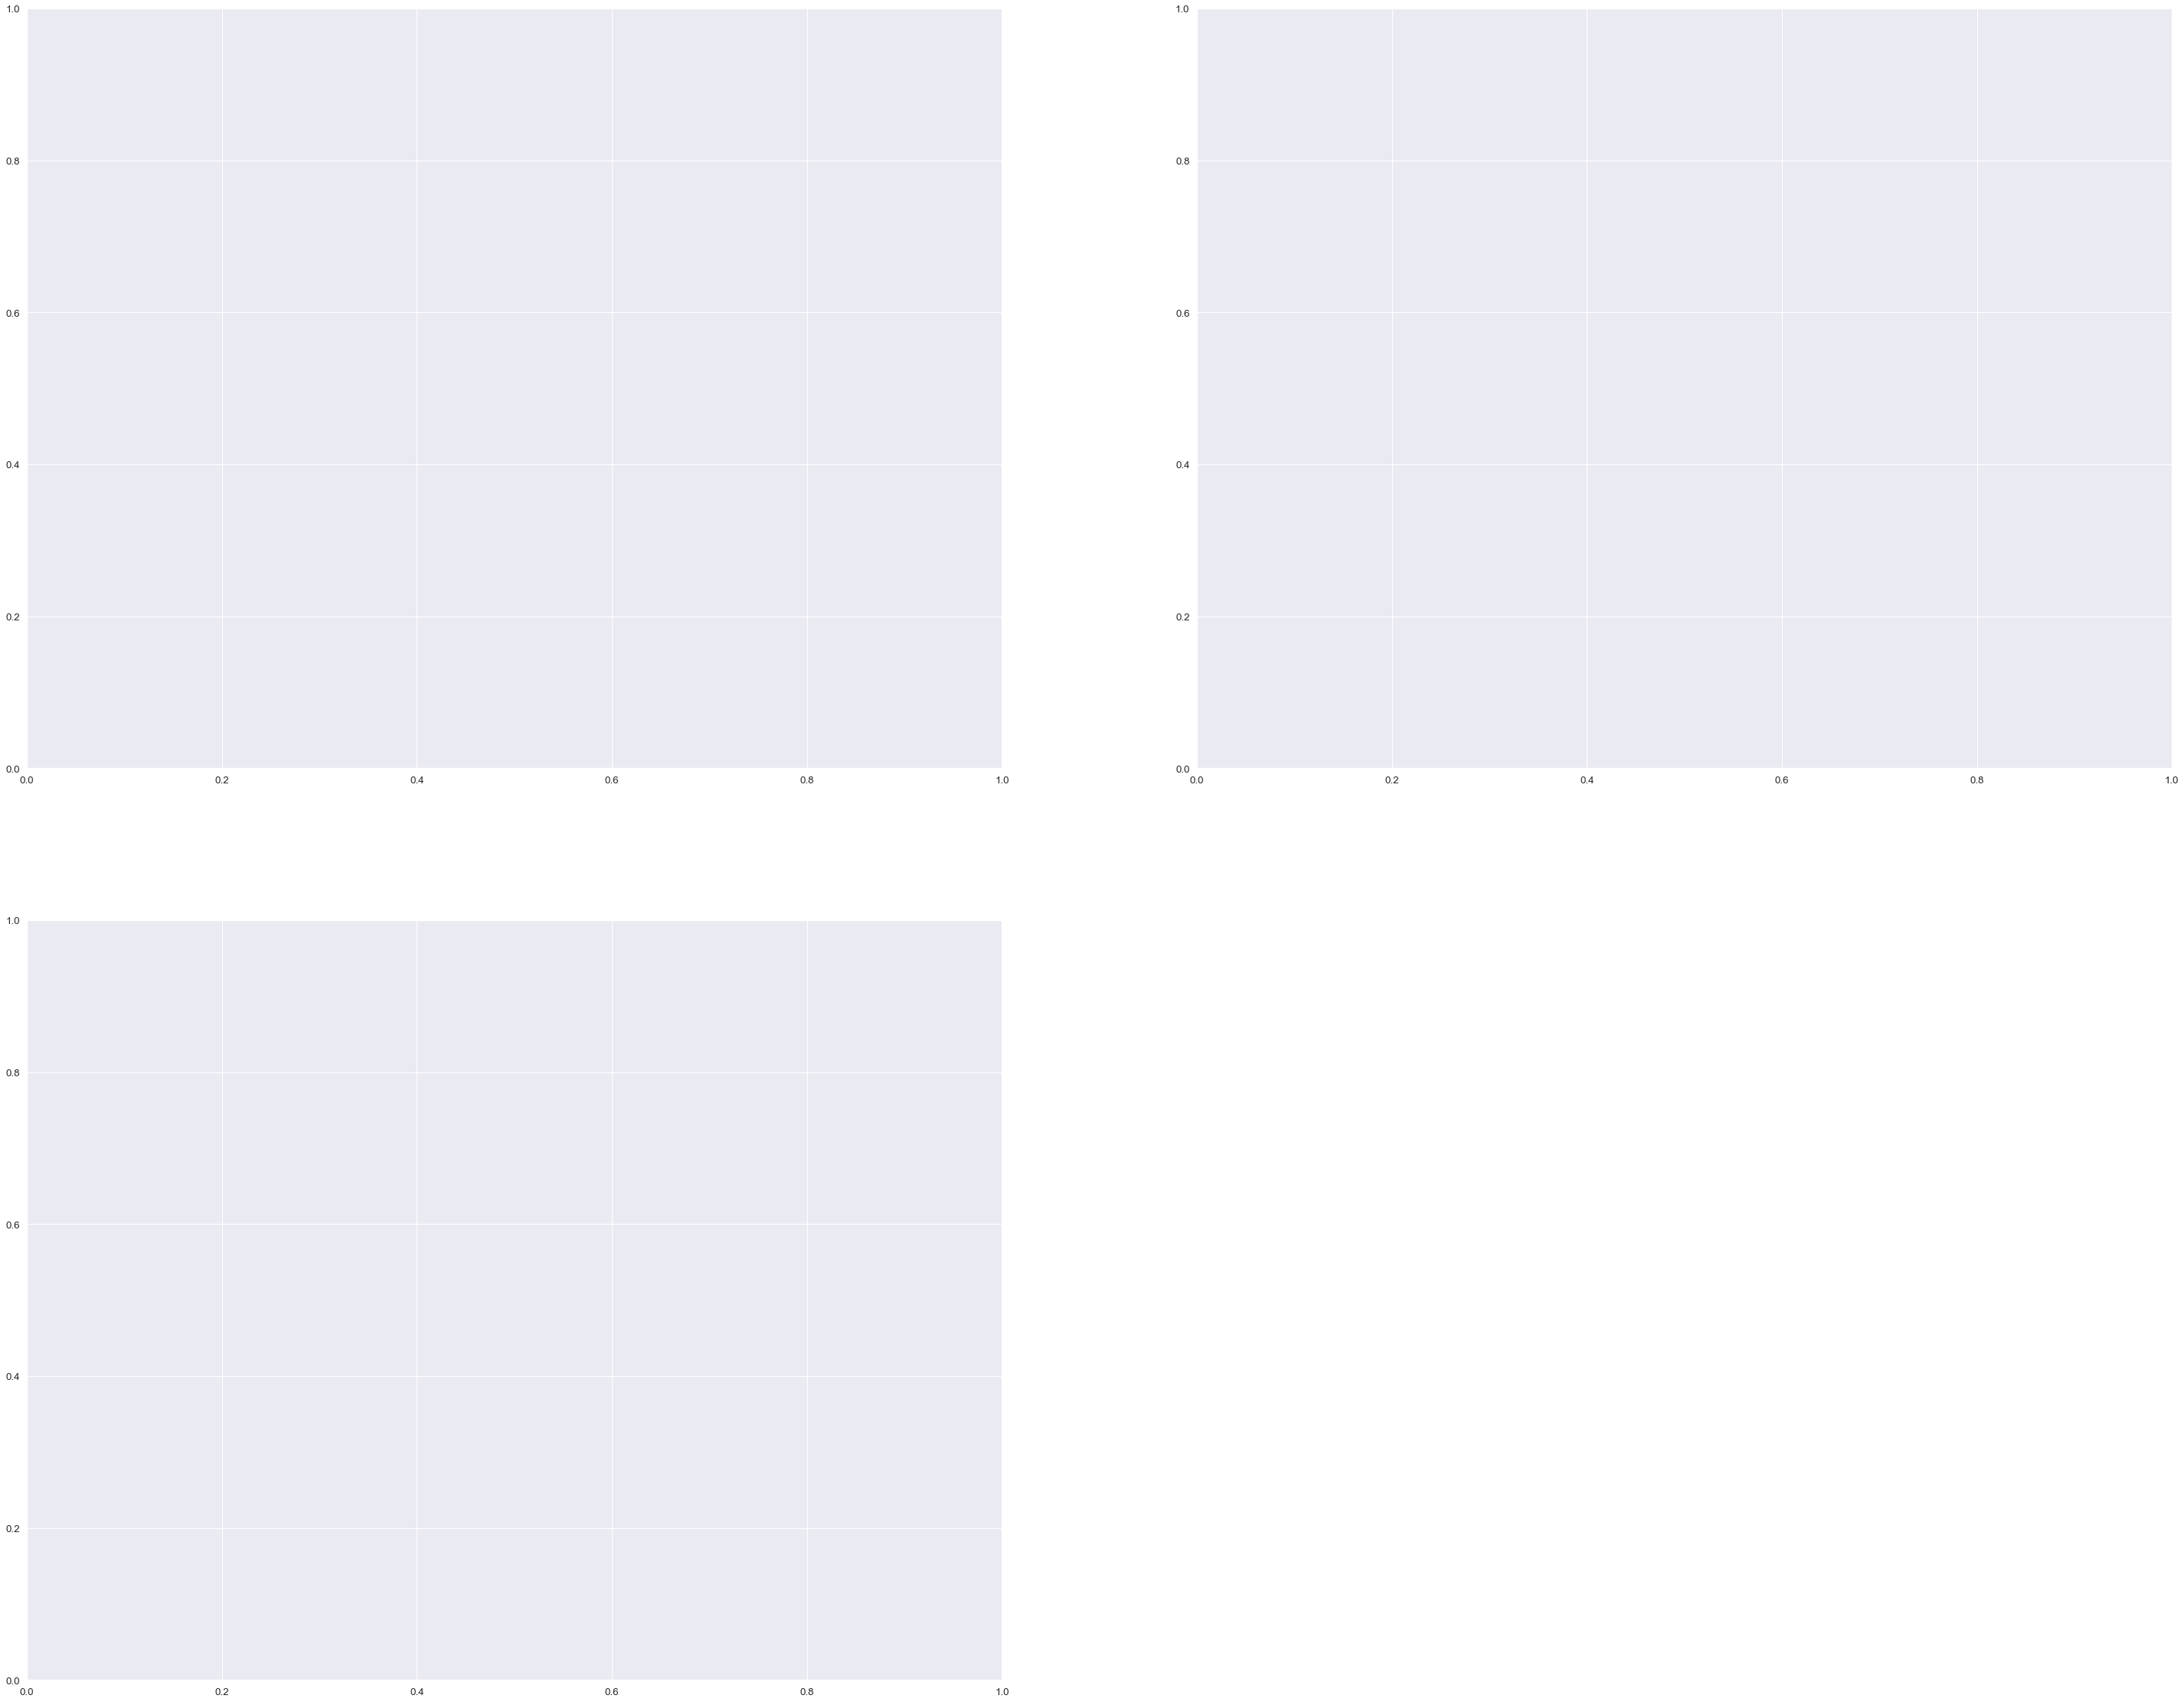

In [19]:
plt.figure(figsize=(50,40)) 
plt.subplot(2, 2, 1)
onegram = pd.DataFrame(onegrams,columns=['Word', 'Count'])


plt.subplot(2, 2, 2)
bigram = pd.DataFrame(bigrams,columns=['Word', 'Count'])


plt.subplot(2, 2, 3)
trigram = pd.DataFrame(trigrams,columns=['Word', 'Count'])


In [20]:
onegram.to_csv('og.csv',index=False)
bigram.to_csv('bg.csv',index=False)
trigram.to_csv('tg.csv',index=False)

## LDA  ???

In [21]:
import pyLDAvis


# Model Building

In [22]:
# Split the dataframe
y = jobs["fraudulent"]
X = jobs.drop('fraudulent', axis=1)

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(X.all_text)
X.shape

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(17880, 166845)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Save Models


In [25]:
# Mulitnomial NB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_predict = mnb.predict(X_train)

from sklearn.metrics import f1_score
val_f1_mnb = f1_score(mnb_predict, y_train, average='macro')

mnb_test = mnb.predict(X_test)
test_f1_mnb = f1_score(mnb_test, y_test, average='macro')

from sklearn.metrics import accuracy_score
test_ac_mnb = accuracy_score(mnb_test,y_test)


#SVM
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

svm_predict = svm.predict(X_train)
val_f1_svm = f1_score(svm_predict, y_train, average='macro')

svm_test = svm.predict(X_test)
test_f1_svm = f1_score(svm_test, y_test, average='macro')

test_ac_svm = accuracy_score(svm_test,y_test)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train,y_train)
logreg_predict = logreg.predict(X_train)
val_f1_logreg = f1_score(logreg_predict, y_train, average='macro')

logreg_test = logreg.predict(X_test)
test_f1_logreg = f1_score(logreg_test,y_test, average='macro')

test_ac_logreg = accuracy_score(logreg_test,y_test)


df = {'Model': ['Multinomial NB', 'SVM', 'Logistic Regression'],
         'val_f1': [val_f1_mnb ,val_f1_svm ,val_f1_logreg],
         'test_f1': [test_f1_mnb, test_f1_svm, test_f1_logreg ],
         'test_acc': [test_ac_mnb, test_ac_svm, test_ac_logreg]}

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
dataset = pd.DataFrame({'y_test': y_test, 'mnb_test': mnb_test, 'svm_test': svm_test, 'logreg_test': logreg_test})
dataset

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,y_test,mnb_test,svm_test,logreg_test
4708,0,0,0,0
11079,0,0,0,0
12357,0,0,0,0
14511,0,0,0,0
16691,0,0,0,0
...,...,...,...,...
10855,0,0,0,0
9827,0,0,0,0
4903,0,0,0,0
6723,0,0,0,0


In [33]:
dataset.to_csv('dataset.csv', index=False)

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
df.to_csv('scores.csv',index=False)

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
from sklearn.metrics import confusion_matrix
cmmnb = confusion_matrix(mnb_test,y_test)
cmsvm = confusion_matrix(svm_test,y_test)
cmlogreg = confusion_matrix(logreg_test,y_test)

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[3391,   43],
       [   4,  138]], dtype=int64)

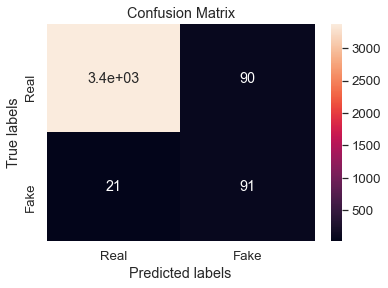

In [88]:
from pylab import savefig

ax= plt.subplot()
sns.heatmap(cmmnb, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Real', 'Fake']); ax.yaxis.set_ticklabels(['Real', 'Fake'])
savefig("cmmnb.png")

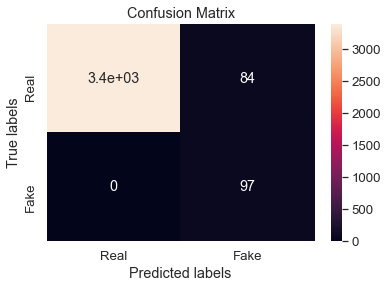

In [89]:
ax= plt.subplot()
sns.heatmap(cmsvm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Real', 'Fake']); ax.yaxis.set_ticklabels(['Real', 'Fake'])
savefig("cmsvm.png")

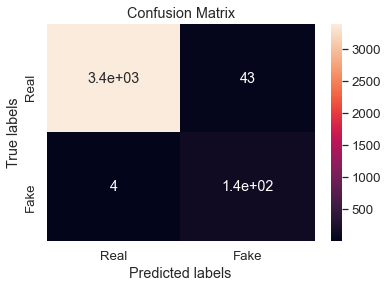

In [90]:
ax= plt.subplot()
sns.heatmap(cmlogreg, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Real', 'Fake']); ax.yaxis.set_ticklabels(['Real', 'Fake'])
savefig("cmlogreg.png")

In [36]:
pip install dash-bootstrap-components

C:\Users\Bobby\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.Collecting dash-bootstrap-components

